# Generalized lineal model

In [276]:

#import machine_learning_fundamentals.utils.paths as path
import pandas as pd
import numpy as np
import seaborn as sns
import random
from glm.glm import GLM
from glm.families import Gaussian, Poisson
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #to divide the data
from sklearn import preprocessing
from scipy import stats
import pingouin as pg

In [277]:
#!pip install git+https://github.com/madrury/py-glm.git

In [278]:
#!pip install pingouin 

In [279]:
data = pd.read_csv('/home/alejandrodf1/Documents/radon_project/radon_project/data/raw/radon18.csv', sep=';')  #we get the data

In [280]:
data.head()

,Casa,house_code,hour,day,day_model,Hora,[]_RADON_(pCi/L),[]_RADON_(Bq/m3),effective_dose_[mSv/y],20_hours_effective_dose_[mSv],Temperatura_(C),clima,age,ventilacion,time_period
0,pat 37,P-01,1,03/08/2022,1,10:00:00,0.70,25.90,0.44030,0.459170,23.8,soleado,old,medium,morning
1,pat 37,P-01,2,03/08/2022,1,11:00:00,0.72,26.64,0.45288,0.472289,23.8,soleado,old,medium,morning
2,pat 37,P-01,3,03/08/2022,1,12:00:00,0.67,24.79,0.42143,0.439491,21.1,soleado,old,medium,afternoon
3,pat 37,P-01,4,03/08/2022,1,13:00:00,0.64,23.68,0.40256,0.419813,21.2,soleado,old,medium,afternoon
4,pat 37,P-01,5,03/08/2022,1,14:00:00,0.70,25.90,0.44030,0.459170,21.3,soleado,old,medium,afternoon


# T student and dose response graph

<AxesSubplot:xlabel='hour', ylabel='effective_dose_[mSv/y]'>

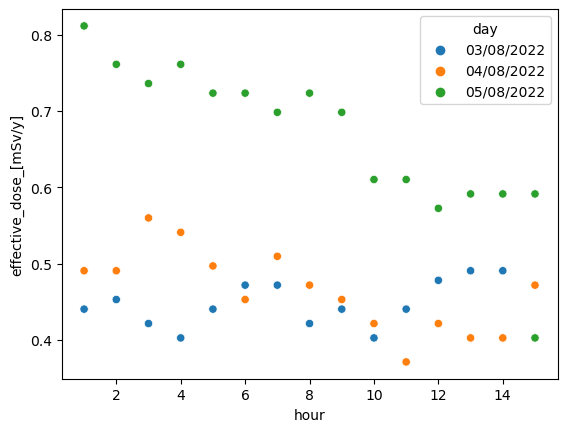

In [281]:
pat_37 = data[(data['Casa']=='pat 37')]
pat_37 = pd.DataFrame(pat_37)
sns.scatterplot(data=pat_37, x = 'hour', y = 'effective_dose_[mSv/y]',hue = 'day')

In [282]:
#effective_d = data.loc[data.house_code == 'P-01', data.day == '03/8/2022', 'effective_dose_[mSv/y]']
#pat_37
#effective_d = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
#time_h = data.loc[data.house_code == 'P-01', data.day == '04/8/2022', 'effective_dose_[mSv/y]']
#time_h
#effective_d[0:15]

In [283]:
#effective_d2 = effective_d[15:30]
#effective_d2 
#effective_d3 = effective_d[30:47]
#effective_d3

### t student para casa P-01

In [284]:
effective_d = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
time_h = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
effective_d1 = effective_d[0:15]
effective_d2 = effective_d[15:30]
effective_d3 = effective_d[30:47]



print(pg.ttest(x=effective_d1, y=effective_d2, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d1, y=effective_d3, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d2, y=effective_d3, alternative='two-sided', correction=False))

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -0.620653   28   two-sided  0.539847  [-0.04, 0.02]  0.226631  0.399   

         power  
T-test  0.0921  
                T  dof alternative         p-val           CI95%   cohen-d  \
T-test -10.760276   28   two-sided  1.863637e-11  [-0.28, -0.19]  3.929097   

             BF10  power  
T-test  2.757e+08    1.0  
               T  dof alternative         p-val           CI95%   cohen-d  \
T-test -8.950404   28   two-sided  1.048937e-09  [-0.27, -0.17]  3.268225   

             BF10  power  
T-test  6.351e+06    1.0  


## t student para P-02

In [285]:
effective_d = data.loc[data.house_code == 'P-02', 'effective_dose_[mSv/y]']
time_h = data.loc[data.house_code == 'P-02', 'effective_dose_[mSv/y]']
effective_d1 = effective_d[0:15]
effective_d2 = effective_d[15:30]
effective_d3 = effective_d[30:47]



print(pg.ttest(x=effective_d1, y=effective_d2, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d1, y=effective_d3, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d2, y=effective_d3, alternative='two-sided', correction=False))

               T  dof alternative         p-val           CI95%   cohen-d  \
T-test -7.187012   28   two-sided  8.023544e-08  [-0.13, -0.07]  2.624326   

             BF10  power  
T-test  1.164e+05    1.0  
              T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.41325   28   two-sided  0.168603  [-0.05, 0.01]  0.516046  0.726   

           power  
T-test  0.276367  
                T  dof alternative         p-val        CI95%  cohen-d  \
T-test  10.230279   28   two-sided  5.808779e-11  [0.06, 0.1]  3.73557   

            BF10  power  
T-test  9.48e+07    1.0  


<AxesSubplot:xlabel='hour', ylabel='effective_dose_[mSv/y]'>

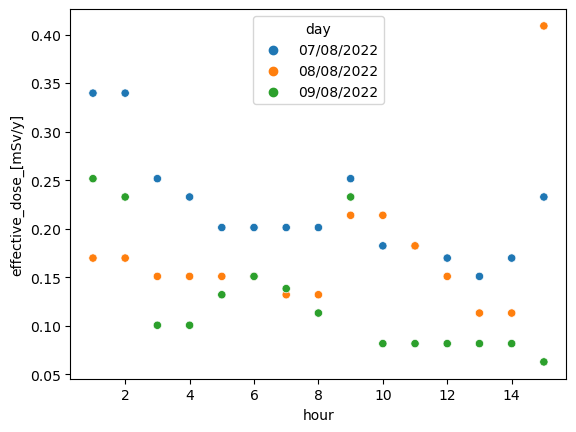

In [286]:
bloque_A4 = data[(data['Casa']=='A')]
sns.scatterplot(data=bloque_A4, x = 'hour', y = 'effective_dose_[mSv/y]',hue = 'day')

In [287]:
pat_28 = data[(data['Casa']=='PAT 28')]

In [288]:
pat_32 = data[(data['Casa']=='PAT 32')]

In [289]:
pat_33 = data[(data['Casa']=='PAT 33')]

In [290]:
pat_1 = data[(data['Casa']=='PAT 1')]

# Lineal model

In [291]:
age_build = data['age']
ventilation = data['ventilacion']
time_interval = data['time_period']
#features = ['age','ventilacion','time_period']
#features = data[features]

In [292]:
#label encoder to change countries in numbers
#encoder = preprocessing.LabelEncoder()
#features_encoded = encoder.fit_transform(features)

#create 30 elements for the dataset
#age_elements,ventilacion_1,timep_elements = [random.choice(features_encoded) for i in range(len(data))]
#data['age_elements','ventilacion','time_period'] = age_elements, ventilacion_1, timep_elements

In [293]:
#convert categorical variables into number
#countries = ['EC','CO','BR','MX'] # countries

age_build = data['age']

#label encoder to change countries in numbers
encoder = preprocessing.LabelEncoder()
agebuild_encoded = encoder.fit_transform(age_build)

#create 30 elements for the dataset
age_elements = [random.choice(agebuild_encoded) for i in range(len(data))]
data['age_elements'] = age_elements


In [294]:
ventilation = data['ventilacion']

encoder = preprocessing.LabelEncoder()
ventilation_encoded = encoder.fit_transform(ventilation)

#create 30 elements for the dataset
ventilation_elements = [random.choice(ventilation_encoded) for i in range(len(data))]
data['ventilation_elements'] = ventilation_elements


In [295]:
len(ventilation_elements)


270

In [296]:
time_interval = data['clima']

encoder = preprocessing.LabelEncoder()
timei_encoded = encoder.fit_transform(time_interval)

#create 30 elements for the dataset
timei_elements = [random.choice(timei_encoded) for i in range(len(data))]
data['timei_elements'] = timei_elements


In [297]:
y = data.dtypes
y

Casa                              object
house_code                        object
hour                               int64
day                               object
day_model                          int64
Hora                              object
[]_RADON_(pCi/L)                 float64
[]_RADON_(Bq/m3)                 float64
effective_dose_[mSv/y]           float64
20_hours_effective_dose_[mSv]    float64
Temperatura_(C)                  float64
clima                             object
age                               object
ventilacion                       object
time_period                       object
age_elements                       int64
ventilation_elements               int64
timei_elements                     int64
dtype: object

In [298]:
#obtaining data for training x= features, y=effective dose
feature_cols = ['hour','day_model', 'age_elements','timei_elements','Temperatura_(C)','ventilation_elements']
x  = np.array(data[feature_cols])

#y = data['effective_dose_[mSv/y]']
y = np.array(data['effective_dose_[mSv/y]'])
x

array([[ 1. ,  1. ,  1. ,  2. , 23.8,  2. ],
       [ 2. ,  1. ,  1. ,  6. , 23.8,  2. ],
       [ 3. ,  1. ,  1. ,  3. , 21.1,  0. ],
       ...,
       [13. ,  3. ,  1. ,  6. , 22.6,  2. ],
       [14. ,  3. ,  1. ,  3. , 22.6,  1. ],
       [15. ,  3. ,  1. ,  6. , 22.2,  1. ]])

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [300]:
X_train

array([[ 9. ,  2. ,  1. ,  0. , 23.3,  0. ],
       [ 6. ,  3. ,  1. ,  2. , 22.9,  1. ],
       [ 2. ,  2. ,  1. ,  7. , 21.9,  2. ],
       ...,
       [13. ,  2. ,  1. ,  2. , 22.4,  0. ],
       [ 3. ,  1. ,  1. ,  2. , 20.9,  2. ],
       [ 8. ,  3. ,  0. ,  2. , 22.9,  2. ]])

In [301]:
#train the model
regressor = LinearRegression()
regresion_train_model=regressor.fit(X_train, Y_train)
#linear_model = GLM(family=Gaussian())
#linear_model.fit(X_train, Y_train)

In [302]:
regressor.coef_

array([-0.0018242 ,  0.04769792,  0.05087153,  0.00598112, -0.01951736,
        0.03716824])

In [303]:
intercept = regresion_train_model.intercept_

In [304]:
y_pred = regressor.predict(X_test)

In [306]:
regressor.score(X_test,Y_test)

0.06726821598253763